## Model Test

In [72]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import keras_cv
from keras_cv import visualization
import tensorflow as tf

In [108]:
model = load_model('model.keras')


/Users/sam.treweek/BJSS/MetOffice/solar-flare/.venv/lib/python3.9/site-packages/keras/src/saving/serialization_lib.py:727: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)


In [107]:
class_ids = [
    "flare",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
{'boxes': array([[[ 2.46799622e+01,  5.47885864e+02,  1.30944550e+02,
          6.82912537e+02],
        [ 4.91070824e+01,  5.48156128e+02,  1.54975266e+02,
          6.83025024e+02],
        [-3.51360321e-01,  5.47416321e+02,  1.06943726e+02,
          6.83683289e+02],
        [ 5.33351440e+02,  5.46197388e+02,  6.31638977e+02,
          6.68245850e+02],
        [ 5.17743408e+02,  5.36937683e+02,  6.15942139e+02,
          6.60150208e+02],
        [ 6.50206757e+01,  5.40267700e+02,  1.70174713e+02,
          6.75491028e+02],
        [ 5.46908508e+02,  5.54272827e+02,  6.48060791e+02,
          6.74956360e+02],
        [ 4.98707458e+02,  5.47252625e+02,  6.00210815e+02,
          6.68458313e+02],
        [ 8.05768127e+01,  5.48624878e+02,  1.87397964e+02,
          6.83116699e+02],
        [ 4.08991814e+01,  5.31377441e+02,  1.46389160e+02,
          6.67245544e+02],
        [ 4.81120728e+02,  5.37739014e+02,  5.85444946e+02,
          6.61206604e

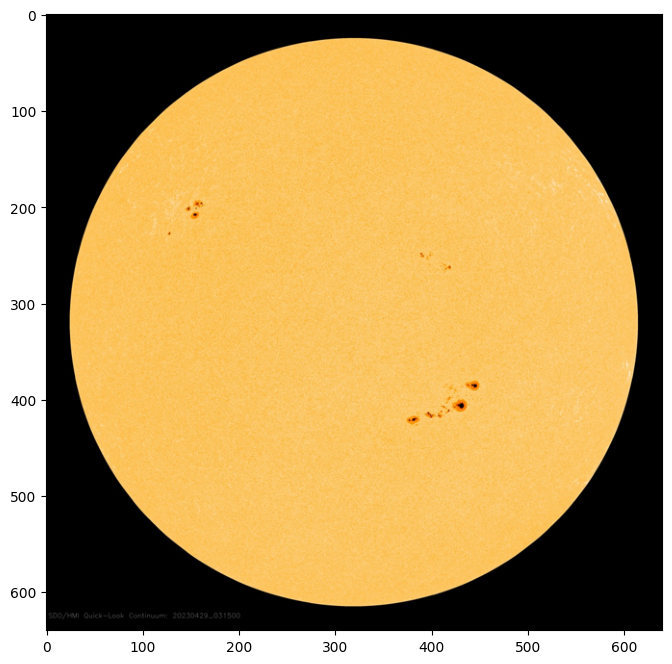

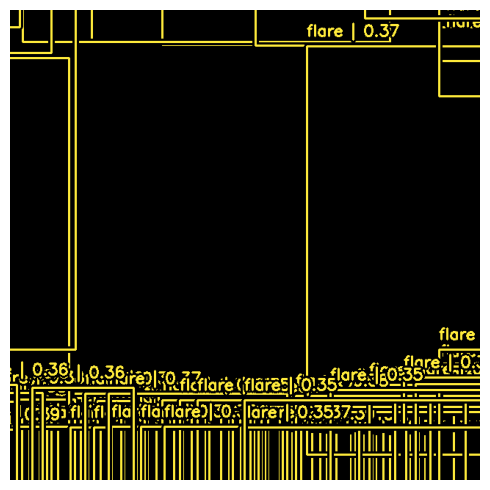

In [128]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from keras_cv import visualization  # Import the visualization module

def visualize_detections(model, img_path):
    # Load and preprocess the image
    img = Image.open(img_path)
    img_resized = img.resize((640, 640))
    img_array = np.array(img_resized) / 255.0

    img_batch = np.expand_dims(img_array, axis=0)
    # Make predictions using the model
    y_pred = model.predict(img_batch)
    print(y_pred)

    # Visualize detections
    plt.figure(figsize=(8, 8))
    plt.imshow(img_array)


    # y_pred is a bounding box Tensor: {"classes": ..., boxes": ...}
    visualization.plot_bounding_box_gallery(
        img_batch,
        value_range=(0, 255),
        rows=1,
        cols=1,
        y_pred=y_pred,
        scale=5,
        font_scale=0.7,
        bounding_box_format="xywh",
        class_mapping=class_mapping,
    )

    plt.axis('off')
    plt.show()

# Visualize detections on a single image
img_path = "./test-images/20230429_031500_1024_HMIIF.jpg"
visualize_detections(model, img_path)
